In [8]:
using Plots
plotlyjs(dpi=300, display_type=:inline)
# pyplot(dpi=300)
# unicodeplots()
# theme(:dracula)
theme(:default)

In [9]:
function parseTiming(fname::String)::Real
    f = open(fname)
    for line in eachline(f)
        occursin("Braid", line) && continue
        occursin("wall time", line) && return parse(Float64, split(line)[end])
    end
    close(f)
end

function parseIters(fname::String)::Integer
    f = open(fname)
    for line in eachline(f)
        occursin("max iterations", line) && continue
        occursin("iterations", line) && return parse(Int64, split(line)[end])
    end
    close(f)
end

parseIters (generic function with 1 method)

In [10]:
ncores = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
ml = 4
tΔ = zeros(length(ncores)) # preallocate mutable types
tθ = zeros(length(ncores))
tfmg = zeros(length(ncores))

for i in 1:length(ncores)
    tfmg[i] = parseTiming("lorenz_theta_Delta_fmg_nc$(ncores[i])_ml$(ml)")
    tΔ[i] = parseTiming("lorenz_theta_Delta_nc$(ncores[i])_ml$(ml)")
    tθ[i] = parseTiming("lorenz_theta_nc$(ncores[i])_ml$(ml)")
end
fmgiters = parseIters("lorenz_theta_Delta_fmg_nc1_ml$(ml)")
Δiters = parseIters("lorenz_theta_Delta_nc1_ml$(ml)")
θiters = parseIters("lorenz_theta_nc1_ml$(ml)")
println(θiters)
println(Δiters)
println(fmgiters)

18
12
7


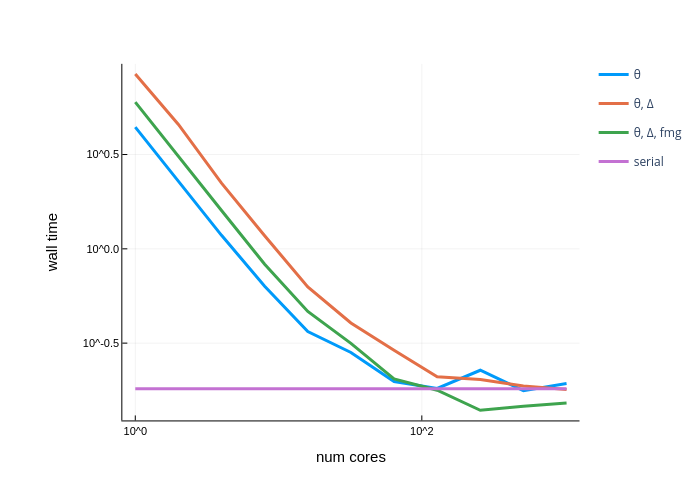

In [11]:
pl = plot(ncores, [tθ tΔ tfmg],
          linewidth=3,
          dpi=100,
          label=["θ" "θ, Δ" "θ, Δ, fmg"],
          xaxis=("num cores", :log),
          yaxis=("wall time", :log),
)
plot!(pl, ncores, x->parseTiming("lorenz_theta_ml1"), linewidth=3, label="serial")
savefig(pl, "scaling.png")
plot!()

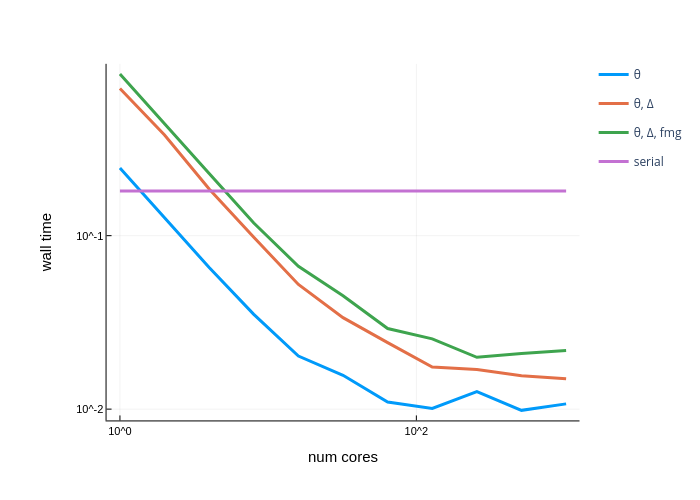

In [12]:
pl = plot(ncores, [tθ/θiters tΔ/Δiters tfmg/fmgiters],
          linewidth=3,
          dpi=100,
          label=["θ" "θ, Δ" "θ, Δ, fmg"],
          xaxis=("num cores", :log),
          yaxis=("wall time", :log),
)
plot!(pl, ncores, x->parseTiming("lorenz_theta_ml1"), linewidth=3, label="serial")
savefig(pl, "scaling_normalized.png")
plot!()

In [71]:
parseTiming("lorenz_theta_Delta_nc_ml1")

0.027052

In [75]:
tθ

10-element Vector{Float64}:
 0.146
 0.0769
 0.0393
 0.0217
 0.0128
 0.00794
 0.00575
 0.0115
 0.00931
 0.0124